<a href="https://colab.research.google.com/github/Aseel707/First-Repo/blob/main/Lab1(Image_prossesing)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt

Create a synthetic image

In [27]:
image = np.zeros((8, 8))# 8 row,8 column >0 for black colour
print(image)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


Visualise the image

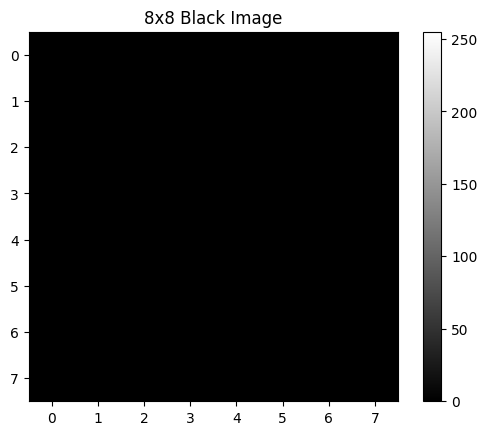

In [28]:
plt.imshow(image, cmap='gray',vmin=0,vmax=255)
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()

Pixels and intensity values

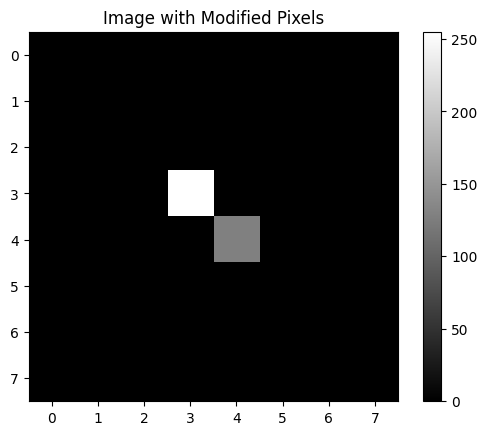

In [29]:
image[3, 3] = 255
image[4, 4] = 128
plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

Grey scale images

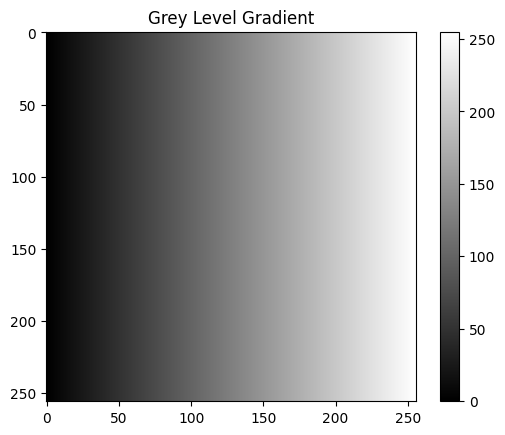

In [30]:
gradient = np.tile(np.linspace(0, 255, 256), (256, 1))
plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()


Image acquisition and representation
ي هذه المرحلة، ننتقل من إنشاء صور اصطناعية إلى التعامل مع صور حقيقية.

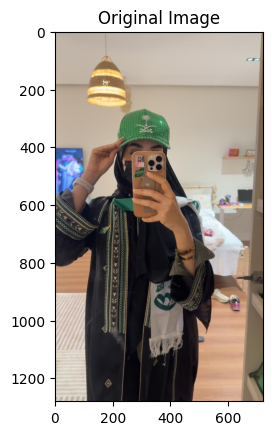

(1280, 720, 3)
uint8


In [31]:
#Load and inspect an image
from matplotlib.image import imread
image = imread('صوره شخصيه.jpeg')
plt.imshow(image)
plt.title("Original Image")
plt.show()
print(image.shape)
print(image.dtype)

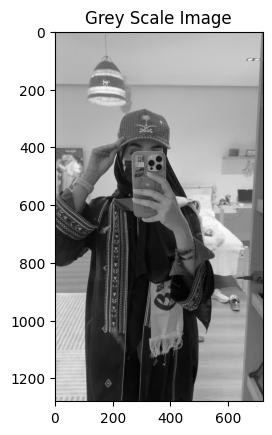

In [32]:
#Convert the image to grey scale by averaging the colour channels.
gray = image.mean(axis=2)#بهذه الطريقة، تتحول المصفوفة من ثلاثية الأبعاد (صورة ملونة) إلى مصفوفة ثنائية الأبعاد (صورة تدرج رمادي).
plt.title("Grey Scale Image")
plt.imshow(gray, cmap='gray')
plt.show()

6. Low level image processing: image in, image out

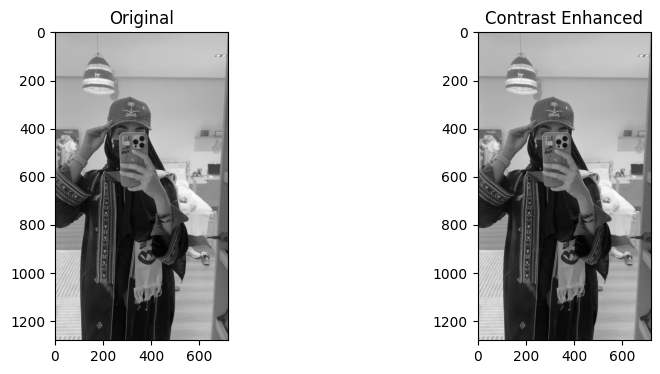

In [33]:
#6.1: Image enhancement by contrast stretching
min_val = gray.min()
max_val = gray.max()
gray_contrast = (gray - min_val) / (max_val - min_val) *255
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(gray_contrast , cmap='gray')
plt.title("Contrast Enhanced")
plt.show()


7. Noise and image restoration

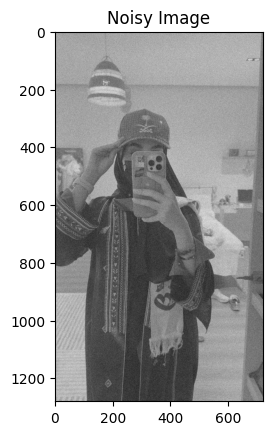

In [34]:
#Exercise 7.1: Add artificial noise
noise = np.random.normal(0, 20, gray.shape)
noisy = gray + noise
plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()


##Exercise 7.2: Simple smoothingfilter


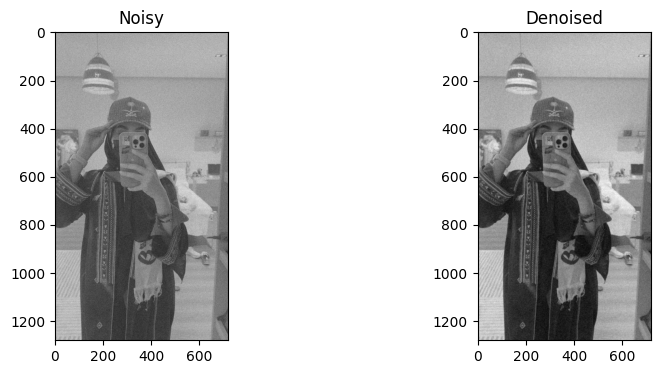

In [35]:
def mean_filter(img,k=3):
  pad=k//2
  padded=np.pad(img,pad,mode='edge')
  output=np.zeros_like(img)

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
       output[i, j] = padded[i:i+k, j:j+k].mean()
  return output
denoised = mean_filter(noisy)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")
plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised")
plt.show()

8. From image processing to image analysis

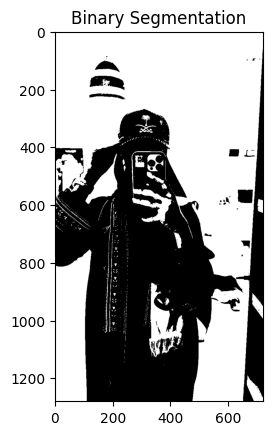

In [36]:
#Exercise 8.1: Simple threshold segmentation
threshold = gray.mean()
binary = gray > threshold
plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

9. Mini project: connecting theory to practice
Task
Using only NumPy and Matplotlib:
1. Create a synthetic image containing at least two objects
2. Add noise to the image
3. Apply enhancement and denoising
4. Segment the objects using a threshold
Deliverables
• Code
• Output images
• Short explanation mapping each step to the image processing stages shown in the
Chapter 1 pipeline diagram

In [37]:
import numpy as np
import matplotlib.pyplot as plt
#1- Create a synthetic image
project_img=np.zeros((100,100))

print(project_img)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
# add tow object
project_img[20:50, 20:50] = 200
project_img[60:90, 60:90] = 100


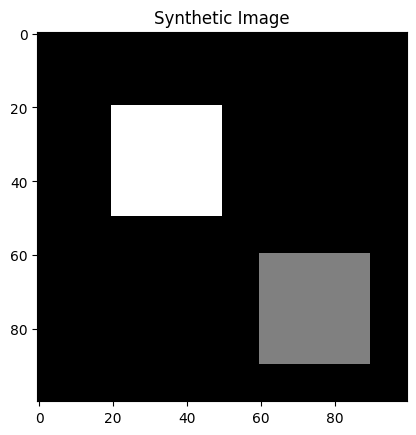

In [39]:
plt.imshow(project_img, cmap='gray')
plt.title("Synthetic Image")
plt.show()

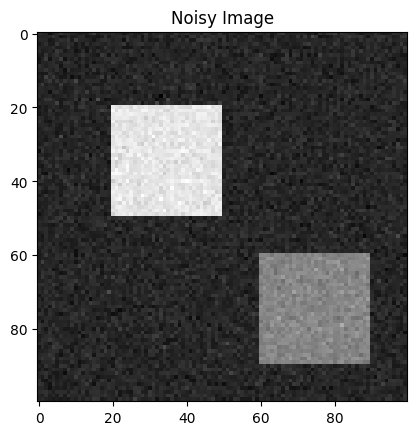

In [40]:
#2-Add noise to the image

noise=np.random.normal(0,10,project_img.shape)
noisy=project_img+noise

plt.imshow(noisy, cmap='gray')
plt.title("Noisy Image")
plt.show()

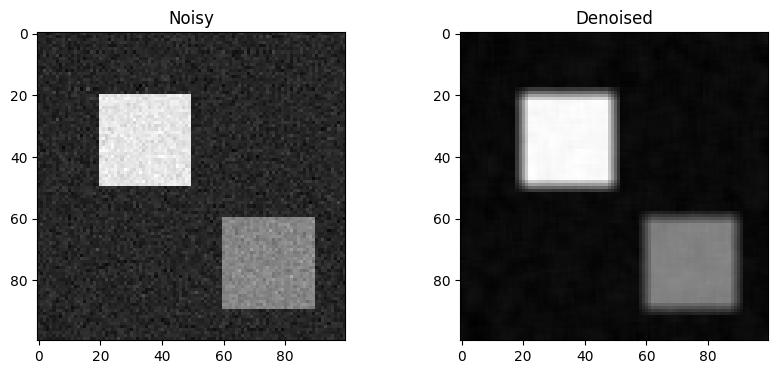

In [41]:
#3-Apply enhancement and denoising

denoised_project = mean_filter(noisy, k=5)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy, cmap='gray')
plt.title("Noisy")
plt.subplot(1,2,2)
plt.imshow(denoised_project, cmap='gray')
plt.  title("Denoised")
plt.show()


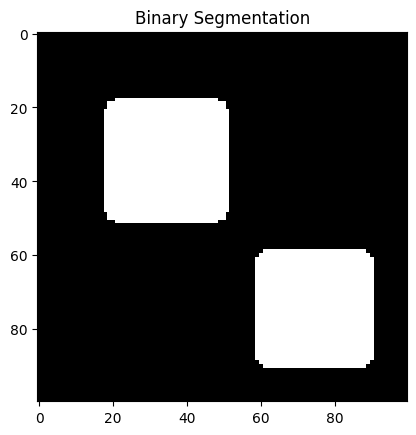

In [42]:
#4-Segment the objects using a threshold
threshold = denoised_project.mean()
binary = denoised_project> threshold
plt.imshow(binary, cmap='gray')
plt.title("Binary Segmentation")
plt.show()

 Mapping each step to the image processing stages pipline in ch1
  1- image acquisition :
  when i create the synthetic image
  in step 1
  2-image Enhancement :
  Image enhancement by contrast stretching in step 6
  3- image Restoration:
  by adding a noise to the image
  then denoise it using Mean filter
  in step 7

4-Segmentation:
converting the image to Binary image in step 8 and in the mine project

5-Representation & Description:
It begins when the image is converted into digital data that can be analyzed (such as knowing the number of objects).



10. Reflection questions
1. Where does image processing end and image analysis begin in your mini project?
Image Processing ends at the stage of image enhancement and noise removal (Denoising), where the output is still an 'image' enhanced for the human eye. Image Analysis begins at the step of Segmentation or Thresholding.
2. Which steps correspond to low level processing only?
1-image acquisition
2- image enhancement
3- image Restoration
3. Why is digitisation always an approximation of reality?
1-Sampling: Reality is continuous, while a digital image consists of a finite number of pixels (a grid of squares). We take samples from reality and leave gaps between them.

2-Quantization: In reality, colors and brightness are infinite, but in a computer, they must be represented by a limited number of levels (for example, 256 levels in 8-bit images). Any value between two levels is rounded to the nearest available number.